In [1]:
from IPython.core.display import HTML
css_file = './numericalmoocstyle.css'
HTML(open(css_file, "r").read())

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
def plot(v1, v2, xlabl, ylabl, title):
    ''' a function for plots
    
    Parameters
    ----------
    v1: x-axis vector
    v2: y-axis vector
    xlabl: label for x-axis values
    ylabl: label for y-axis values
    title: plot title
    
    Return:
    -------
    Plot!
    '''
    #
    pyplot.figure(figsize=(8,8))
    pyplot.grid(True)
    #
    pyplot.xlabel(xlabl, fontsize=18)
    pyplot.ylabel(ylabl, fontsize=18)
    #
    pyplot.tick_params(axis='x', pad=10)
    pyplot.tick_params(axis='y', pad=10)
    #
    #pyplot.xticks(numpy.arange(0, 3000, 200))
    #
    pyplot.title(title)
    pyplot.plot(v1,v2, color='k', ls='--', lw=2, marker='o');

## Nitrogen

In [4]:
def get_dynamic_viscosity_nitrogen(data_points):
    ''' Defines thermal conductivity for nitrogen gas at different 
    temperatures and pressures
    
    thermal conductivity units: milliWatts/(meter-Kelvin)
    
     Ref: Handbook of Physical properties of Liquids and Gases. Pure Substances 
    and mixtures. N.B. Vargaftik; Y.K. Vinogradov; V. S. Yargin. pg. 795, 804
    '''
    #temperature array
    TN = numpy.zeros((data_points),dtype=float)
    TN[0] = 65
    TN[1] = 70
    TN[2] = 80
    TN[3] = 90
    TN[4] = 100
    TN[5] = 110
    TN[6] = 120
    TN[7] = 130
    TN[8] = 140
    TN[9] = 150
    TN[10] = 160
    TN[11] = 180
    TN[12] = 200
    TN[13] = 250
    TN[14] = 300
    TN[15] = 350
    TN[16] = 400
    TN[17] = 450
    TN[18] = 500
    TN[19] = 600
    TN[20] = 700
    TN[21] = 800
    TN[22] = 1000
    TN[23] = 1200
    TN[24] = 1500
    TN[25] = 2000 
    TN[26] = 2500
    TN[27] = 3000 #dissociated values 
    TN[28] = 3200
    TN[29] = 3400
    TN[30] = 3600
    TN[31] = 3800
    TN[32] = 4000
    TN[33] = 4200
    TN[34] = 4400
    TN[35] = 4600
    TN[36] = 4800
    TN[37] = 5000
    TN[38] = 5200
    TN[39] = 5400
    TN[40] = 5600
    TN[41] = 5800
    TN[42] = 6000

    # dynamic viscosity array 
    kN = numpy.zeros((data_points),dtype=float)
    kN[0] = 44. #@ 0 MPa
    kN[1] = 47.3
    kN[2] = 53.9
    kN[3] = 60.5
    kN[4] = 67.2
    kN[5] = 73.7
    kN[6] = 80.3
    kN[7] = 86.7
    kN[8] = 93.0
    kN[9] = 99.2
    kN[10] = 105.2
    kN[11] = 117.0
    kN[12] = 128.3
    kN[13] = 154.7
    kN[14] = 178.8
    kN[15] = 201.1
    kN[16] = 221.9
    kN[17] = 241.6
    kN[18] = 260.2
    kN[19] = 295.1
    kN[20] = 327.5
    kN[21] = 357.9
    kN[22] = 414.6
    kN[23] = 466.9
    kN[24] = 539.6
    kN[25] = 649.8
    kN[26] = 750.1
    kN[27] = 920. #dissociated values, 1 bar
    kN[28] = 967.
    kN[29] = 1014.
    kN[30] = 1061.
    kN[31] = 1106.
    kN[32] = 1153.
    kN[33] = 1199.
    kN[34] = 1244.
    kN[35] = 1290.
    kN[36] = 1336.
    kN[37] = 1381.
    kN[38] = 1427.
    kN[39] = 1473.
    kN[40] = 1518.
    kN[41] = 1562.
    kN[42] = 1607.
    #
    return kN, TN

In [5]:
npoints1 = 43
mu1, T1 = get_dynamic_viscosity_nitrogen(npoints1)

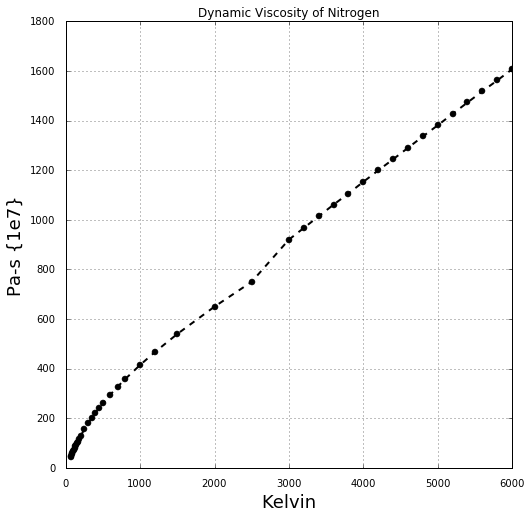

In [6]:
plot(T1,mu1,'Kelvin', 'Pa-s {1e7}', 'Dynamic Viscosity of Nitrogen')

### curve fit

In [7]:
AN2 = numpy.vstack([T1**2,T1,numpy.ones(len(T1))]).T
aN2,bN2,cN2 = numpy.linalg.lstsq(AN2,mu1)[0]

AN3 = numpy.vstack([T1**3,T1**2,T1,numpy.ones(len(T1))]).T
aN3,bN3,cN3,dN3 = numpy.linalg.lstsq(AN3,mu1)[0]

AN4 = numpy.vstack([T1**4,T1**3,T1**2,T1,numpy.ones(len(T1))]).T
aN4,bN4,cN4,dN4,eN4 = numpy.linalg.lstsq(AN4,mu1)[0]

In [8]:
#2nd order
muN2 = numpy.zeros_like(T1)
muN2[:] = aN2*(T1[:]**2) + bN2*(T1[:]) + cN2
#3rd order
muN3 = numpy.zeros_like(T1)
muN3[:] = aN3*(T1[:]**3) + bN3*(T1[:]**2) + cN3*T1[:] + dN3
#4th order
muN4 = numpy.zeros_like(T1)
muN4[:] = aN4*(T1[:]**4) + bN4*(T1[:]**3) + cN4*(T1[:]**2) + dN4*T1[:] + eN4

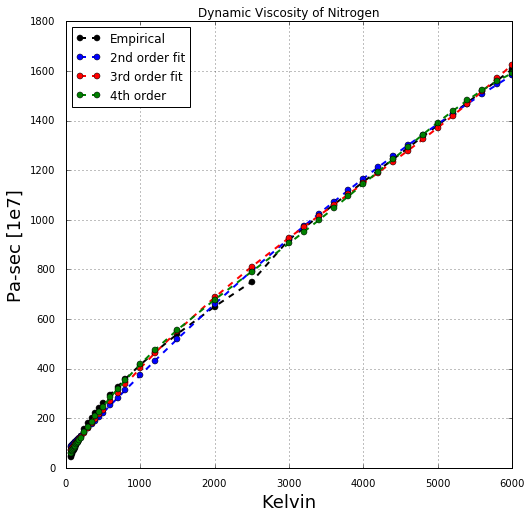

In [9]:
%matplotlib inline
#
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
#
pyplot.xlabel('Kelvin', fontsize=18)
pyplot.ylabel('Pa-sec [1e7]', fontsize=18)
#
pyplot.tick_params(axis='x', pad=10)
pyplot.tick_params(axis='y', pad=10)
#
#pyplot.xticks(numpy.arange(0, 3000, 200))
#
pyplot.title('Dynamic Viscosity of Nitrogen')
#
pyplot.plot(T1,mu1,color='k', ls='--', lw=2, marker='o')
pyplot.plot(T1,muN2,color='b',ls='--', lw=2, marker='o')
pyplot.plot(T1,muN3,color='r',ls='--', lw=2, marker='o')
pyplot.plot(T1,muN4,color='g',ls='--', lw=2, marker='o');
pyplot.legend(['Empirical','2nd order fit','3rd order fit','4th order'],loc='upper left');

#### use third order fit

In [10]:
aN3

4.2177299011972125e-09

In [11]:
bN3

-4.8160156609647342e-05

In [12]:
cN3

0.40073205811284623

In [13]:
dN3

44.208627576799387

##### there is an alternative relationship

In [14]:
muN = numpy.zeros((9),dtype=float)
muN[0] = 1.66 
muN[1] =1.76
muN[2] =1.89
muN[3] =2.12
muN[4] =2.51
muN[5] =2.86
muN[6] =3.19
muN[7] =3.49
muN[8] =3.78

Tn = numpy.ones((9),dtype=float)*273.15
Tn[0] += 0
Tn[1] += 20
Tn[2] += 50
Tn[3] += 100
Tn[4] += 200
Tn[5] += 300
Tn[6] += 400
Tn[7] += 500
Tn[8] += 600


In [1]:
#http://www.engineeringtoolbox.com/gases-absolute-dynamic-viscosity-d_1888.html

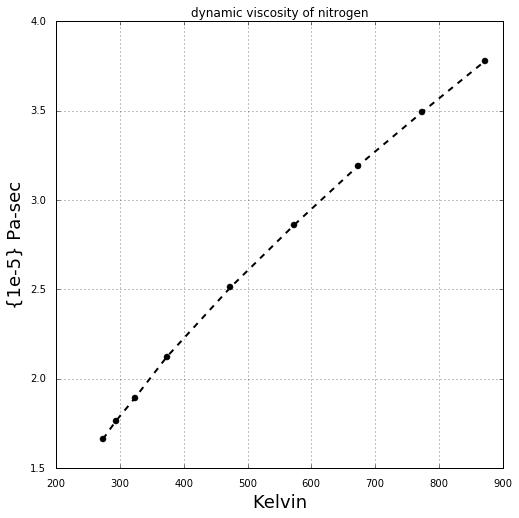

In [17]:
plot(Tn[:], muN[:], 'Kelvin', '{1e-5} Pa-sec', 'dynamic viscosity of nitrogen')

## Boron

In [ ]:
muB = 5.4e-5 #viscosity used in carbon-helium simulation #1e-5#2e-3 #Pa-sec

## Nickel

In [ ]:
muNi = 0.

## Cobalt

In [ ]:
muCo = 0.

## References

##### electrical resistivity of boron nitride
http://iopscience.iop.org/article/10.1088/0022-3727/15/7/009/pdf


##### resistivity of tungsten
http://hypertextbook.com/facts/2004/DeannaStewart.shtml


##### data fit
http://math.stackexchange.com/questions/121212/how-to-find-curve-equation-from-data


##### electrical resisitivity of boron
http://scitation.aip.org/docserver/fulltext/aip/journal/jap/28/11/1.1722660.pdf?expires=1471883048&id=id&accname=2099752&checksum=7088042D610B893B040905189D492442


#### #resistivity of materials
http://www.engineeringtoolbox.com/resistivity-conductivity-d_418.html


http://chemistry.about.com/od/moleculescompounds/a/Table-Of-Electrical-Resistivity-And-Conductivity.htm


##### resistivity of elements
https://en.wikipedia.org/wiki/Electrical_resistivities_of_the_elements_(data_page)


##### electrical resistance of nickel
http://journals.jps.jp/doi/pdf/10.1143/JPSJ.20.1865


##### Temperature dependence of the electrical resistivity of pure cobalt at low temperatures
http://iopscience.iop.org/article/10.1088/0305-4608/14/12/021/pdf


##### viscosity of liquid boron
http://journals.aps.org/prb/pdf/10.1103/PhysRevB.81.140201


##### thermal conductivity of boron and some compounds
http://journals.aps.org/prb/pdf/10.1103/PhysRevB.4.1714


##### ref for viscosity relation
http://www.engineeringtoolbox.com/dynamic-absolute-kinematic-viscosity-d_412.html

